In [1]:
# imports
import os
import sys
from math import sqrt
import numpy as np # linear algebra, etc.
import pandas as pd # data processing, CSV file I/O (e.g., pd.read_csv)
import matplotlib.pyplot as plt
from keras import backend # this is to calculate RMSE; feel free to use TensorFlow, Keras or PyTorch
from sklearn.metrics import mean_squared_error

np.random.seed(0)

In [2]:
# function defn's
def rmse(y_true, y_pred):
    """calculate RMSE"""
    return sqrt( mean_squared_error( y_true, y_pred ) )

def plot_tracklet( x, y, text_pad=.1 ):
    """plot tracklet"""
    # plot x
    num_timeslices = x.shape[0]
    for t in range(num_timeslices):
        lat = x[t,0]  # y axis, col. index is 0
        long = x[t,1] # x axis, col. index is 1
        plt.scatter( long, lat )
        plt.text( long+text_pad, lat-text_pad, r'${}$'.format(t+1) ) # label each timepoint
        if ( t > 0 ): # connect timepoints
            dx = x[t,1]-x[t-1,1]
            dy = x[t,0]-x[t-1,0] 
            plt.arrow( x[t-1,1], x[t-1,0], dx, dy, length_includes_head=True, head_width=0.03, fc='b', ec='b' )
            
    # plot y
    plt.scatter( y[1], y[0] )
    plt.text( y[1]+text_pad, y[0]-text_pad, r'${}$'.format(num_timeslices+1) )
    dx = y[1]-x[t,1]
    dy = y[0]-x[t,0] 
    # last connected is dotted
    plt.arrow( x[t,1], x[t,0], dx, dy, head_width=0.03, fc='b', ec='b', linestyle=':' )
    
    plt.title('input (x) and output (y)')
    plt.show()
        
def plot_predictions(y_true, y_pred):
    """plot predictions v ground truth"""
    plt.scatter( y_true[:,1], y_true[:,0], color='blue' )
    plt.scatter( y_pred[:,1], y_pred[:,0], color='red')
    plt.title('Predictions (red) v Ground truth (blue)')
    plt.show()

In [3]:
# load the data
INFILE = 'timeseries_data.npz'

training_data = np.load( INFILE )
x_base_train = training_data['x_train']
y_base_train = training_data['y_train']
x_base_test = training_data['x_test']
y_base_test = training_data['y_test']

In [4]:
# examine the data
print( "X train shape {}".format( x_base_train.shape ) )
print( "y train shape {}".format( y_base_train.shape ) )
print( "X test shape {}".format( x_base_test.shape ) )
print( "y test shape {}".format( y_base_test.shape ) )

X train shape (297, 3, 5)
y train shape (297, 2)
X test shape (74, 3, 5)
y test shape (74, 2)


x [  0.           2.755623   105.128715     0.79919679   0.57814238]
x [  0.31705361   2.185942   104.861107     0.81526104   0.59010011]
x [3.06247641e-02 2.13199000e+00 1.04832007e+02 8.15261044e-01
 5.85372636e-01]
y [  1.460207 104.491098]


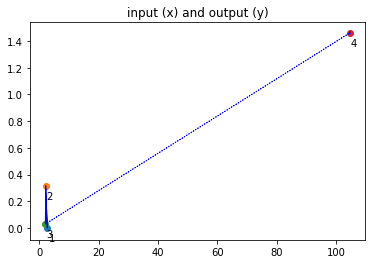

In [8]:
# This timeseries data is from ships.
#
# There are 297 tracklets; each tracklet is part of a larger track.  There can be more than one tracklet associated with a ship.
#
# Each tracklet consists of 3 input timeslices and 1 output timeslice.
# For the input (x), there are 5 dimensions: timestamp of timeslice (this starts at 0 for each new track), latitude (y axis), longitude (x axis), speed information and angle/direction information.
# For the output (y), there are 2 dimensions: latitude, longitude.
tracklet = 0
for t in range(3):
  print( "x {}".format( x_base_train[tracklet][t][:] ) )
print( "y {}".format( y_base_train[tracklet][:] ) )

plot_tracklet( x_base_train[tracklet][:][:], y_base_train[tracklet][:] )

In [68]:
# Instructions
#
# The goal is to predict the output given the input.
# Don't spend too much time on data analysis, visualization, finding anomalies, etc. -- the primary focus is on doing the prediction
# Evaluation criteria will include: low generalization error, speed in returning the exercise, and the code quality (easy to read, extensible, etc.)
#
# Train on x_base_train, y_base_train pairs and test on x_base_test, y_base_test pairs.
# Use a deep learning approach (LSTM, RNN, etc.) -- you choose the model and its parameters.
# You can use TensorFlow, Keras or PyTorch.
# Use RMSE as the objective function to minimize; the goal is to get ~1 RMSE on the testing set.
#
# Calculate the rmse and plot the predictions (see next code block).
# VERY IMPORTANT: save out weights & write code on how to load them so we do not have to retrain your network (don't forget to email the weights with your submission).
#
# Add your code below here and set y_pred at the end (you can use more than 1 code block if you like).

prediction [-14.02239433  64.08883827], ground truth [-14.970237  63.78751 ]
prediction [-8.93786042 66.76930905], ground truth [-14.446023  64.578805]
prediction [-19.57721263 162.38377374], ground truth [-21.09724  150.028467]
RMSE 6.494715737226548


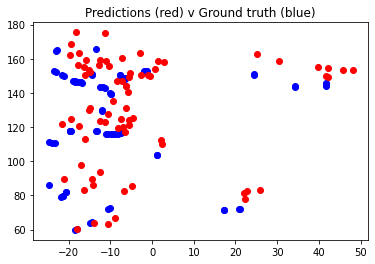

In [69]:
# this is a fake result to demonstrate the rmse and plot_predictions functions
min_x_test = np.min( y_base_test[:,0] )
max_x_test = np.max( y_base_test[:,0] )
min_y_test = np.min( y_base_test[:,1] )
max_y_test = np.max( y_base_test[:,1] )

y_pred = y_base_test.copy() 
perturb_x = .125*(max_x_test-min_x_test)*np.random.rand( y_base_test.shape[0] )
y_pred[:,0] = y_pred[:,0] + perturb_x
perturb_y = .125*(max_y_test-min_y_test)*np.random.rand( y_base_test.shape[0] )
y_pred[:,1] = y_pred[:,1] + perturb_y

# check first 3 predictions
for t in range(3):
    print( "prediction {}, ground truth {}".format( y_pred[t,:], y_base_test[t,:] ) )

# calculate RMSE
error = rmse( y_pred, y_base_test )
print( "RMSE {}".format( error ) )

# plot predictions
plot_predictions( y_base_test, y_pred )